In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./../../datasets/chattahoochee-columbus.csv',header=0, parse_dates=['time'])

/software/spackages/linux-centos8-x86_64/gcc-8.3.1/anaconda3-2019.10-v5cuhr6keyz5ryxcwvv2jkzfj2gwrj4a/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


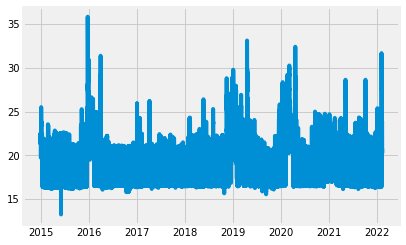

In [5]:
df["time"] = pd.to_datetime(df['time'])
df = df.set_index('time')
plt.plot(df.index,df["height"])

In [6]:
train_set = df[:'2020'].iloc[:,:]
test_set = df['2021':].iloc[:,:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(train_set)

In [8]:
len(training_set_scaled)

210350

In [9]:
X_train = []
y_train = []
for i in range(100,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-100:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [11]:
X_train.shape

(210250, 100, 1)

In [12]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=8)

In [14]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [15]:
def Wape(y, y_pred):
    """Weighted Average Percentage Error metric in the interval [0; 100]"""
    nominator = tf.reduce_sum(tf.abs(tf.subtract(y, y_pred)))
    denominator = tf.add(tf.reduce_sum(tf.abs(y)), K.epsilon())
    wape = tf.scalar_mul(100.0, tf.divide(nominator, denominator))
    return wape

def nse(y, y_pred):
    return (1-(K.sum((y_pred-y)**2)/K.sum((y-K.mean(y))**2)))

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf
from keras.callbacks import ModelCheckpoint



adam = Adam(learning_rate=0.0001)
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# # Third LSTM layer
regressor.add(MaxPooling1D(pool_size=2))


# The Fifth layer
regressor.add(Flatten())

# The Sixth layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer="adam",loss="mean_absolute_error",
                  metrics=[Wape,
                           tf.metrics.MeanAbsoluteError(name="MAE"),
                           tf.metrics.RootMeanSquaredError(name="RMSE"),
                           tf.metrics.MeanAbsolutePercentageError(name="MAPE"),
                           "MSE",
                          ],
                           
                 )

print(1)
filepath="New Leon's LSTM Sweatwater/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
print(1)
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32,callbacks=callbacks_list)

1
1
Epoch 1/50
6559/6571 [============================>.] - ETA: 0s - loss: 0.0124 - Wape: 4.5404 - MAE: 0.0124 - RMSE: 0.0249 - MAPE: 437.3267 - MSE: 6.1884e-04
Epoch 00001: loss improved from inf to 0.01244, saving model to New Leon's LSTM Sweatwater/weights-improvement-01-0.0124.hdf5
6571/6571 [==============================] - 15s 2ms/step - loss: 0.0124 - Wape: 4.5375 - MAE: 0.0124 - RMSE: 0.0249 - MAPE: 436.5794 - MSE: 6.1814e-04
Epoch 2/50
6547/6571 [============================>.] - ETA: 0s - loss: 0.0079 - Wape: 2.8807 - MAE: 0.0079 - RMSE: 0.0180 - MAPE: 387.6411 - MSE: 3.2282e-04
Epoch 00002: loss improved from 0.01244 to 0.00791, saving model to New Leon's LSTM Sweatwater/weights-improvement-02-0.0079.hdf5
6571/6571 [==============================] - 12s 2ms/step - loss: 0.0079 - Wape: 2.8802 - MAE: 0.0079 - RMSE: 0.0180 - MAPE: 386.2758 - MSE: 3.2275e-04
Epoch 3/50
6551/6571 [============================>.] - ETA: 0s - loss: 0.0073 - Wape: 2.6688 - MAE: 0.0073 - RMSE: 0.01

In [ ]:
regressor.fit(X_train,y_train,epochs=50,batch_size=32,callbacks=callbacks_list)

# Create Model and load weights

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

def create_model():
    regressor = Sequential()
# First LSTM layer with Dropout regularisation
    regressor.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

    # # Third LSTM layer
    regressor.add(MaxPooling1D(pool_size=2))


    # The Fifth layer
    regressor.add(Flatten())

    # The Sixth layer
    regressor.add(Dense(units=1))

    # Compiling the RNN
    regressor.compile(optimizer="adam",loss="mean_absolute_error",
                      metrics=[Wape,
                               tf.metrics.MeanAbsoluteError(name="MAE"),
                               tf.metrics.RootMeanSquaredError(name="RMSE"),
                               tf.metrics.MeanAbsolutePercentageError(name="MAPE"),
                               "MSE",
                              ],

                     )

    return regressor
regressor = create_model()
regressor.load_weights("New Leon's LSTM Sweatwater/weights-improvement-44-0.0065.hdf5")

In [19]:
regressor.save("Columbus-CNN.h5")